In [25]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from data_loader import load_pickle
from ADM import ADM
from scipy import signal

In [23]:
# load pickle file
data = load_pickle(1)

# get PPG data
PPG_signal = data['signal']['wrist']['BVP']

In [13]:
up_spikes, down_spikes = ADM(
    PPG_signal,
    up_threshold=10,
    down_threshold=10,
    sampling_rate=64,
    refractory_period=0
)

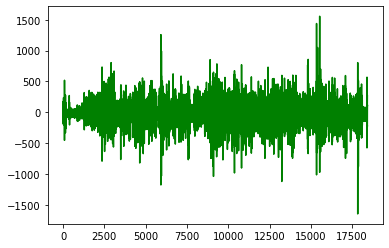

In [18]:
plt.plot(np.arange(0, len(PPG_signal) / 32, 1 / 32), PPG_signal, color='green')

In [60]:
len(PPG_signal) / 64

9212.0

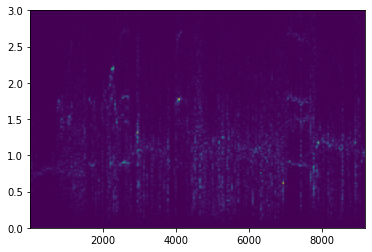

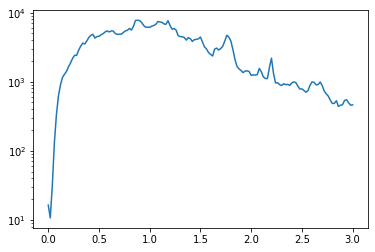

In [83]:
fs = 64
nperseg = 50 * 64
ts = PPG_signal.squeeze(1)

f, t, Sxx = signal.spectrogram(ts, fs, nperseg=nperseg)
_, Pxx_den = signal.welch(ts, fs, nperseg=nperseg)

fmin = 0 # Hz
fmax = 3 # Hz
freq_slice = np.where((f >= fmin) & (f <= fmax))

# keep only frequencies of interest
f   = f[freq_slice]
Sxx = Sxx[freq_slice,:][0]
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.show()


Pxx_den = Pxx_den[freq_slice]
plt.semilogy(f, Pxx_den)
plt.show()